In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/medical_cost_insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


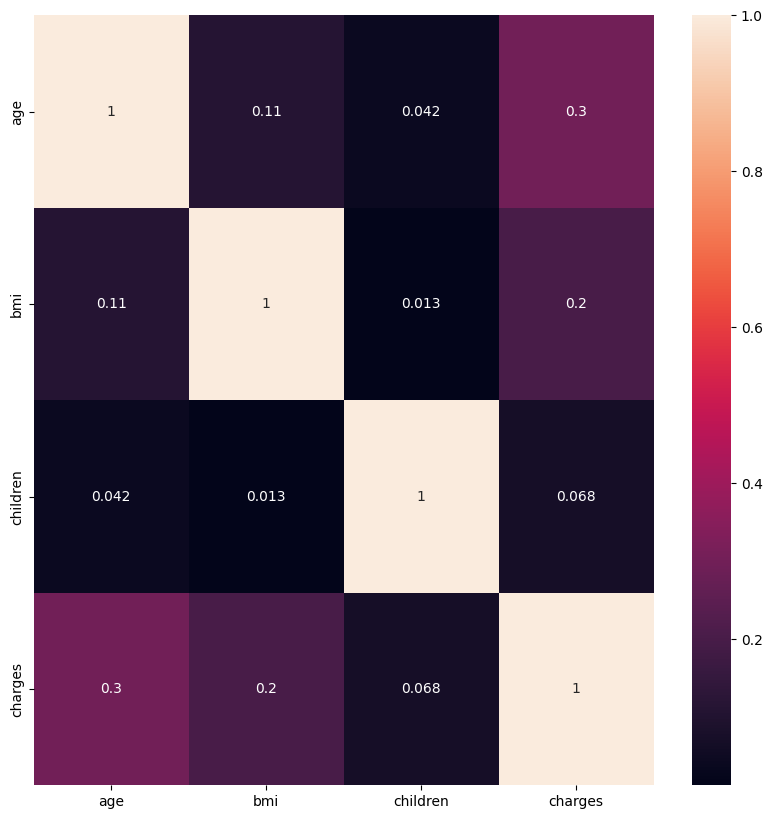

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

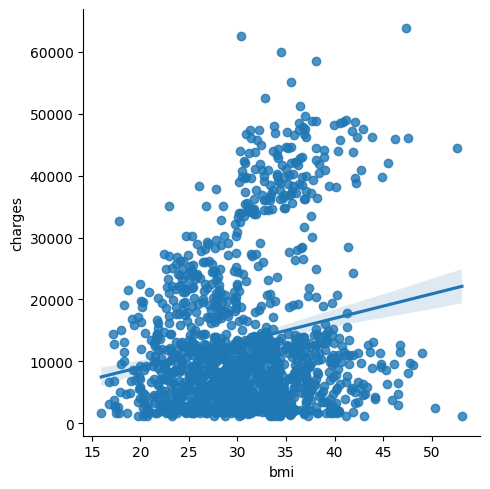

In [ ]:
sns.lmplot(x='bmi',y='charges',data=df)

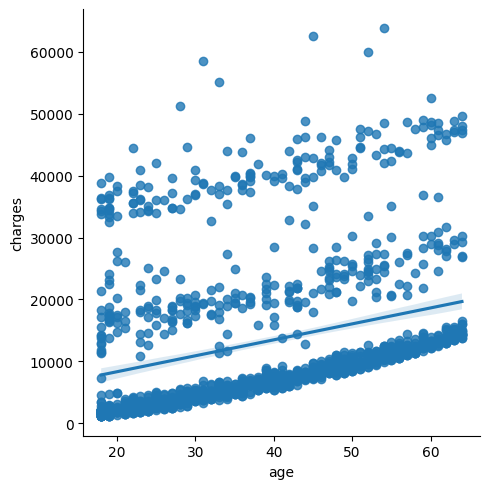

In [ ]:
sns.lmplot(x='age',y='charges',data=df)

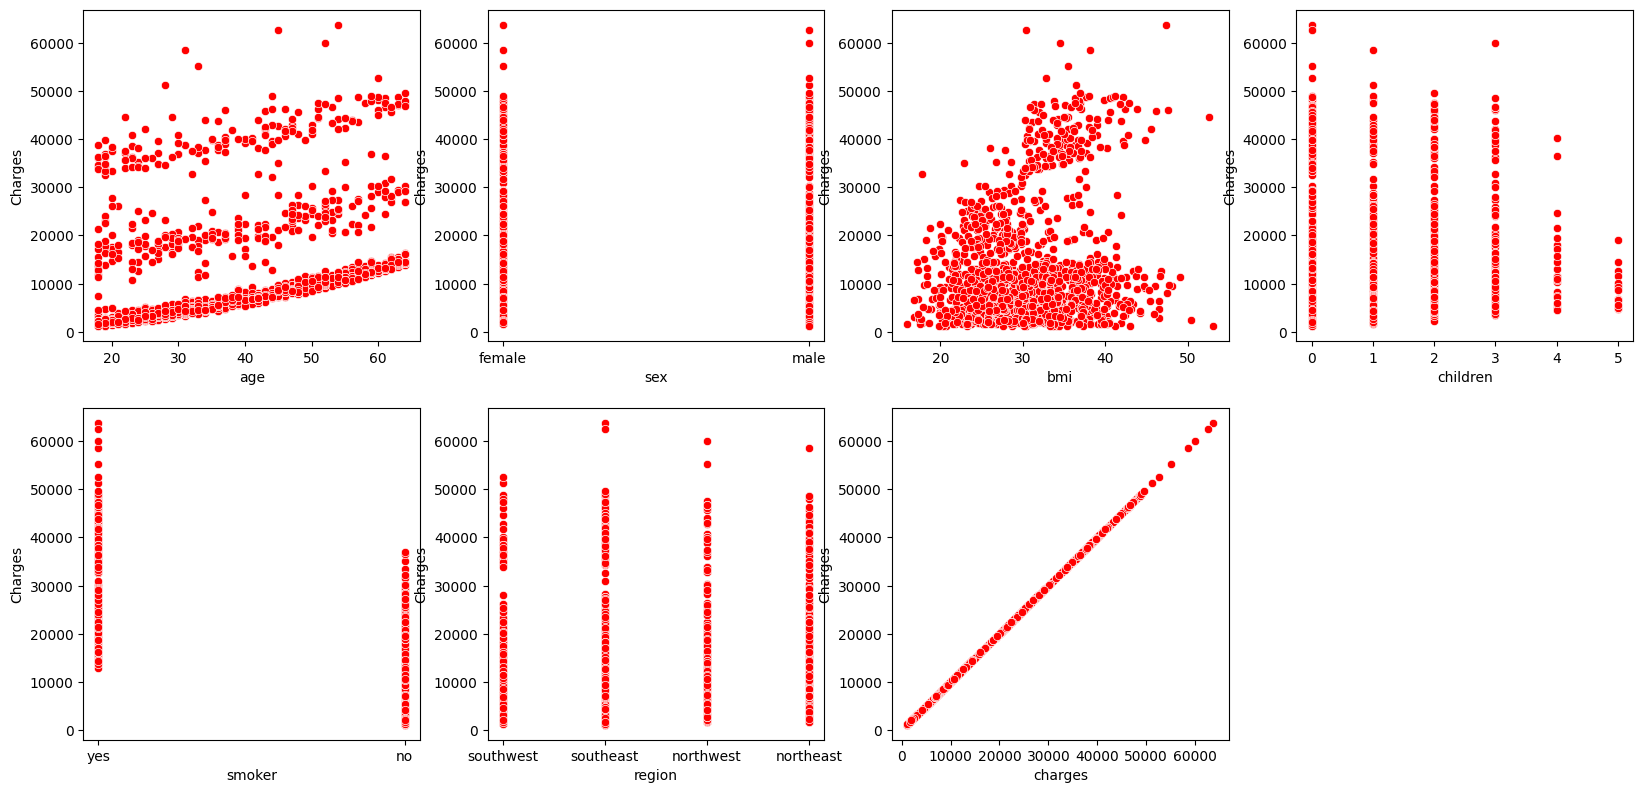

In [ ]:
plt.figure(figsize=(20,25))
p=1
for i in df:
  if p<=10:
    plt.subplot(5,4,p)
    sns.scatterplot(x=i,y='charges',data=df,color='r')
    plt.xlabel(i)
    plt.ylabel('Charges')
  p+=1
plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

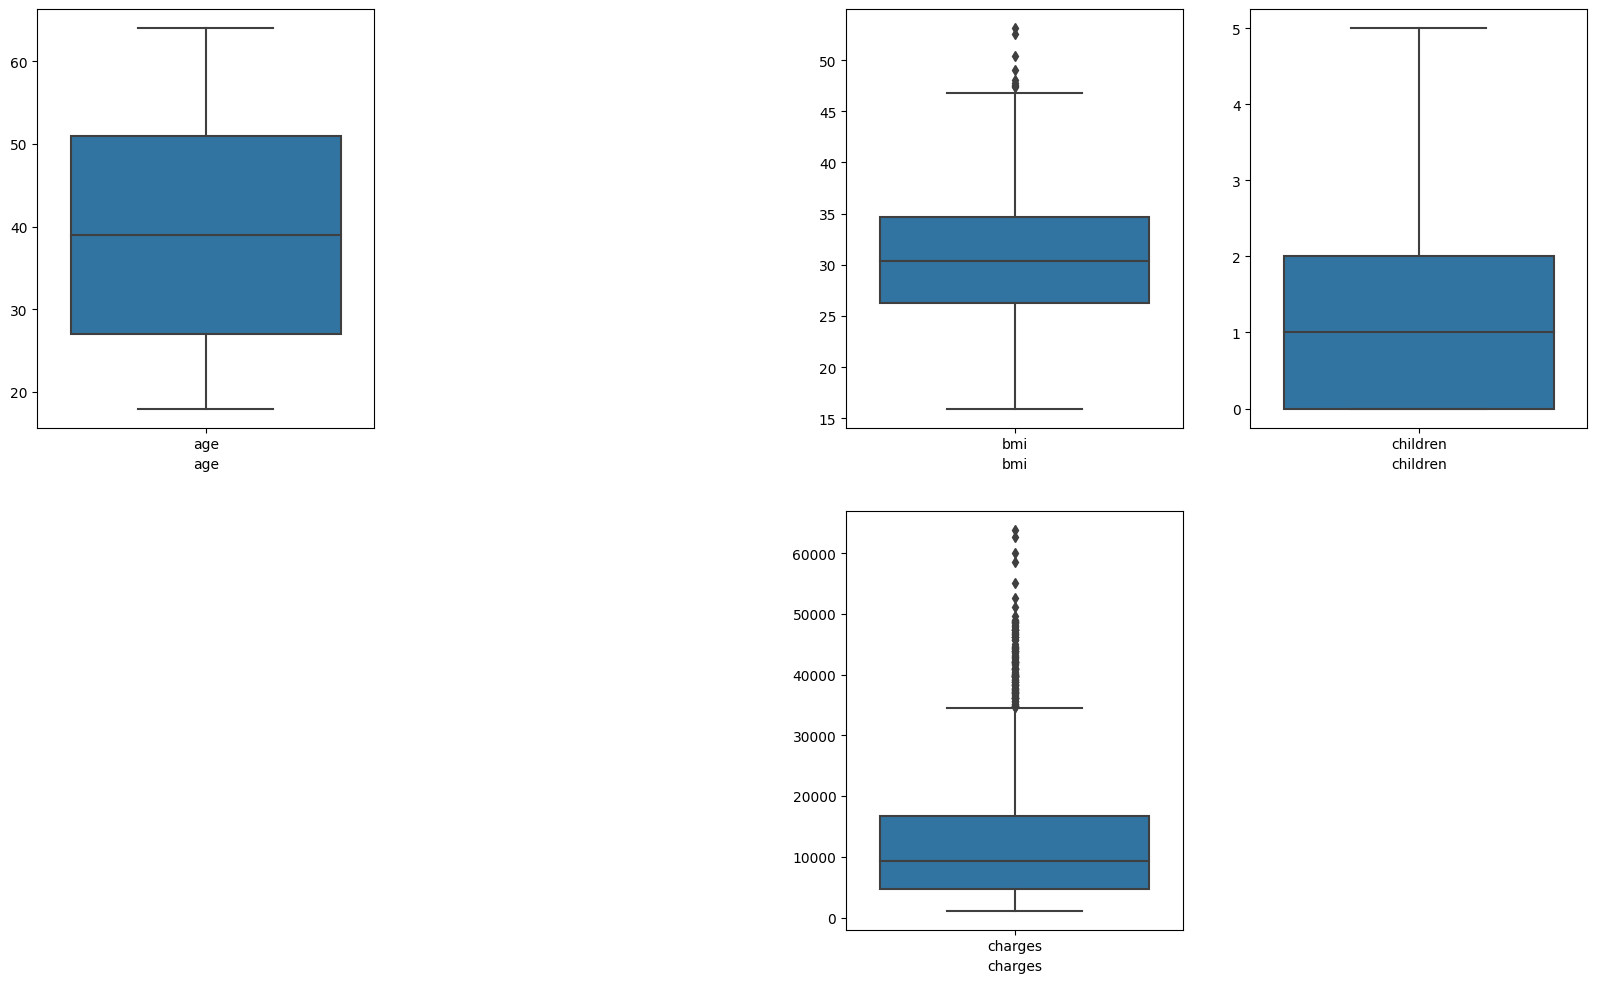

In [ ]:
plt.figure(figsize=(20,25))
p=1
for i in df:
  if not df[i].dtype == 'object':
    plt.subplot(4,4,p)
    sns.boxplot(df[i].to_frame())
    plt.xlabel(i)
  p+=1
plt.show()

In [ ]:
from scipy.stats import zscore
out_feature=df[['bmi','charges']]
z=np.abs(zscore(out_feature))
z

,bmi,charges
0,0.453320,0.298584
1,0.509621,0.953689
2,0.383307,0.728675
3,1.305531,0.719843
4,0.292556,0.776802
...,...,...
1333,0.050297,0.220551
1334,0.206139,0.914002
1335,1.014878,0.961596
1336,0.797813,0.930362


In [ ]:
np.where(z>3)

(array([  34,  116,  543,  577,  819,  847, 1047, 1146, 1230, 1300, 1317]),
 array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0]))

In [ ]:
z.iloc[34,1]

3.132806075214621

In [ ]:
df.shape

(1338, 7)

In [ ]:
#removing outliers and saving to ne dataframe
df1=df[(z<3).all(axis=1)]
df1.shape

(1327, 7)

In [ ]:
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
IQR = q3 - q1
df2 = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]
df2.shape


(1186, 7)

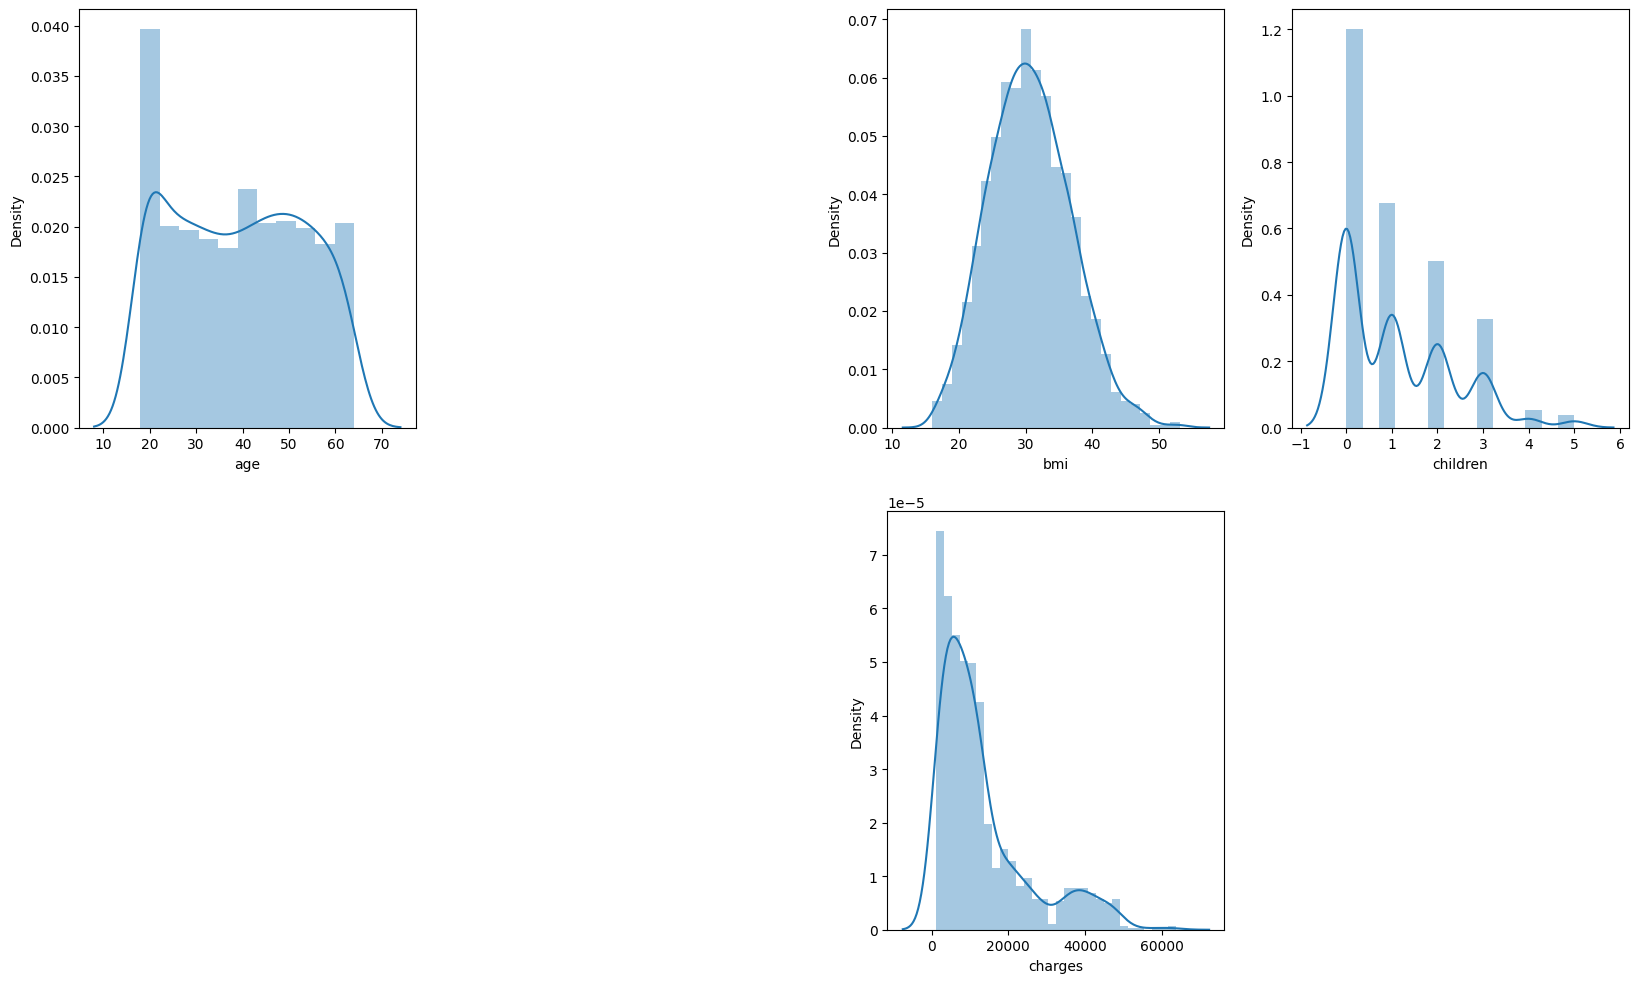

In [ ]:
plt.figure(figsize=(20,25))
p=1
for i in df:
  if not df[i].dtype == 'object':
    plt.subplot(4,4,p)
    sns.distplot(df[i].to_frame())
    plt.xlabel(i)
  p+=1
plt.show()

In [ ]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [ ]:
df['charges']=np.cbrt(df['charges'])

In [ ]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     0.515183
dtype: float64

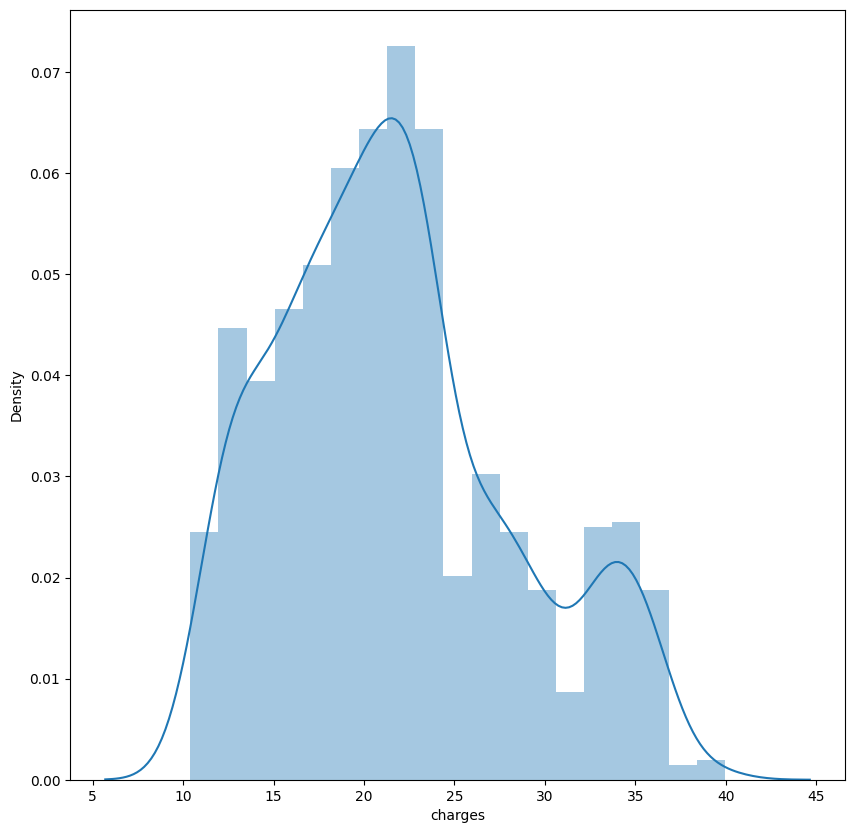

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['charges'])
plt.show()

In [ ]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.451354
bmi,0.109272,1.000000,0.012759,0.156375
children,0.042469,0.012759,1.000000,0.123941
charges,0.451354,0.156375,0.123941,1.000000


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northeast':0,'southeast':1,'southwest':2,'northwest':3})

In [ ]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.002613,0.451354
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.009346,-0.027560
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.054428,0.156375
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.036617,0.123941
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,-0.044124,0.732564
region,0.002613,0.009346,-0.054428,0.036617,-0.044124,1.000000,-0.050065
charges,0.451354,-0.027560,0.156375,0.123941,0.732564,-0.050065,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x= pd.DataFrame(scalar.fit_transform(df[['age','bmi','children','sex','smoker','region',]]))
x

,0,1,2,3,4,5
0,-1.438764,-0.453320,-0.908614,1.010519,1.970587,0.464873
1,-1.509965,0.509621,-0.078767,-0.989591,-0.507463,-0.440513
2,-0.797954,0.383307,1.580926,-0.989591,-0.507463,-0.440513
3,-0.441948,-1.305531,-0.908614,-0.989591,-0.507463,1.370259
4,-0.513149,-0.292556,-0.908614,-0.989591,-0.507463,1.370259
...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.989591,-0.507463,1.370259
1334,-1.509965,0.206139,-0.908614,1.010519,-0.507463,-1.345899
1335,-1.509965,1.014878,-0.908614,1.010519,-0.507463,-0.440513
1336,-1.296362,-0.797813,-0.908614,1.010519,-0.507463,0.464873


In [ ]:
y=df['charges']
y

0       25.654666
1       11.994331
2       16.447599
3       28.013799
4       15.695891
          ...    
1333    21.967271
1334    13.017690
1335    11.768318
1336    12.615872
1337    30.773007
Name: charges, Length: 1338, dtype: float64

In [ ]:
x.columns = ['age','bmi','children','sex','smoker','region']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF Factor,Features
0,1.015163,age
1,1.017644,bmi
2,1.003655,children
3,1.008894,sex
4,1.008384,smoker
5,1.006400,region


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
#finding best random state
maxAcc=0
maxRs=0

for i in range(1,200):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
  lr=LinearRegression()
  lr.fit(x_train,y_train)
  pred=lr.predict(x_test)
  acc=r2_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRs=i
print('Best Accuracy', maxAcc, 'random_state is', maxRs)

Best Accuracy 0.828464262429994 random_state is 112


#Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=112)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge

#LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_lr))
print('MAE',mean_absolute_error(y_test,pred_lr))
print('MSE',mean_squared_error(y_test,pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 Score 0.828464262429994
MAE 1.947735806235741
MSE 7.987613143126935
RMSE 2.826236568853877


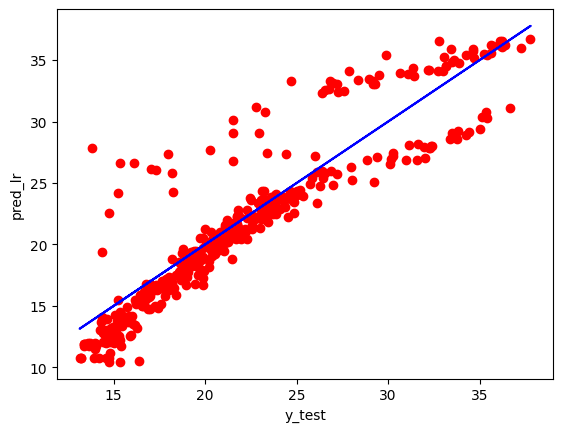

In [ ]:
plt.scatter(x=pred_lr,y=y_test,color='red')
plt.plot(pred_lr,pred_lr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_lr')
plt.show()

#RandomForestRegressor

In [ ]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_rfr))
print('MAE',mean_absolute_error(y_test,pred_rfr))
print('MSE',mean_squared_error(y_test,pred_rfr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 Score 0.8757030398405491
MAE 1.3010049897662832
MSE 5.78792528417098
RMSE 2.4058107332396244


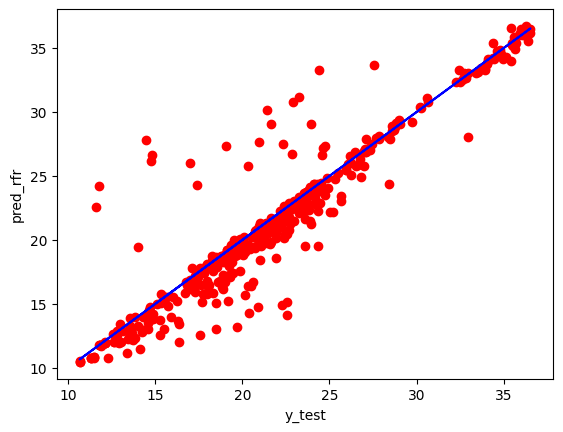

In [ ]:
plt.scatter(x=pred_rfr,y=y_test,color='red')
plt.plot(pred_rfr,pred_rfr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_rfr')
plt.show()

#KNeighborsRegressor

In [ ]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print('R2 Score',r2_score(y_test,pred_knn))
print('MAE',mean_absolute_error(y_test,pred_knn))
print('MSE',mean_squared_error(y_test,pred_knn))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score 0.839305951545752
MAE 1.7509037469041078
MSE 7.482766632997334
RMSE 2.7354646100794895


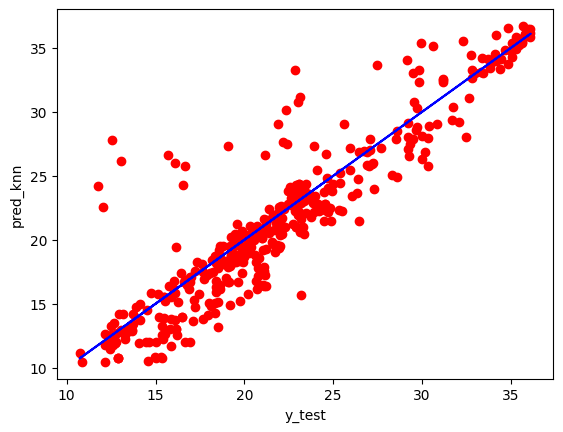

In [ ]:
plt.scatter(x=pred_knn,y=y_test,color='red')
plt.plot(pred_knn,pred_knn,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_knn')
plt.show()

#GradientBoostingRegressor

In [ ]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_gbr))
print('MAE',mean_absolute_error(y_test,pred_gbr))
print('MSE',mean_squared_error(y_test,pred_gbr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2 Score 0.889724875086643
MAE 1.288771580574307
MSE 5.1349943142805134
RMSE 2.2660525841825723


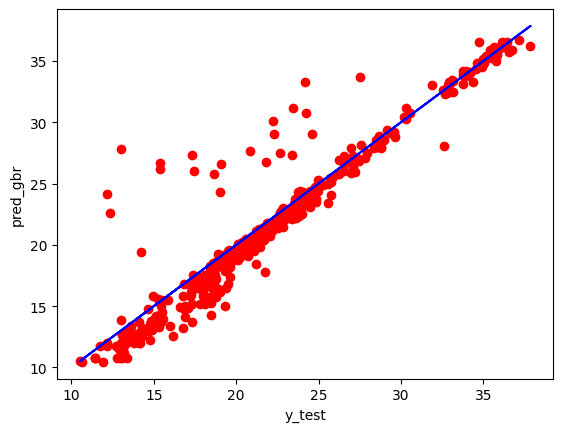

In [ ]:
plt.scatter(x=pred_gbr,y=y_test,color='red')
plt.plot(pred_gbr,pred_gbr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_gbr')
plt.show()

#Lasso

In [ ]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
print('R2 Score',r2_score(y_test,pred_lasso))
print('MAE',mean_absolute_error(y_test,pred_lasso))
print('MSE',mean_squared_error(y_test,pred_lasso))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 Score 0.7427808951621528
MAE 2.6337791213070183
MSE 11.977484876162544
RMSE 3.4608503111464595


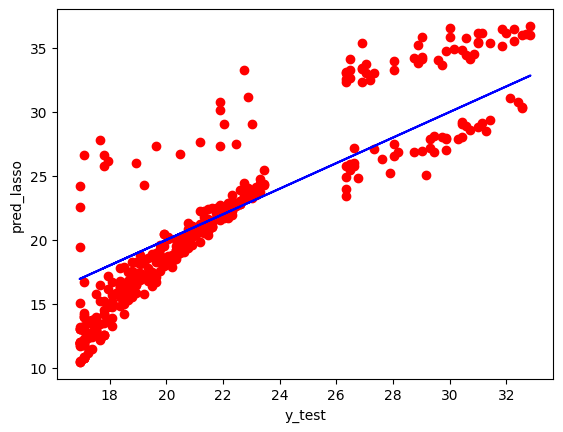

In [ ]:
plt.scatter(x=pred_lasso,y=y_test,color='red')
plt.plot(pred_lasso,pred_lasso,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_lasso')
plt.show()

#Ridge

In [ ]:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
print('R2 Score',r2_score(y_test,pred_ridge))
print('MAE',mean_absolute_error(y_test,pred_ridge))
print('MSE',mean_squared_error(y_test,pred_ridge))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 Score 0.8284255520296969
MAE 1.9494462151758591
MSE 7.989415704543986
RMSE 2.8265554486943976


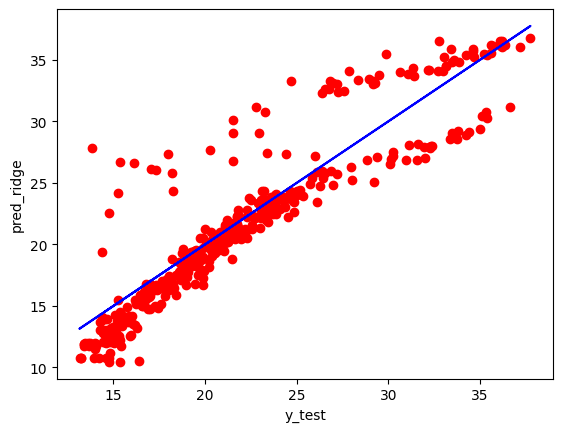

In [ ]:
plt.scatter(x=pred_ridge,y=y_test,color='red')
plt.plot(pred_ridge,pred_ridge,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_ridge')
plt.show()

#DecisionTreeRegressor

In [ ]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_dtr))
print('MAE',mean_absolute_error(y_test,pred_dtr))
print('MSE',mean_squared_error(y_test,pred_dtr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 Score 0.7781562164390905
MAE 1.4026044016151664
MSE 10.330222415424958
RMSE 3.2140663365003777


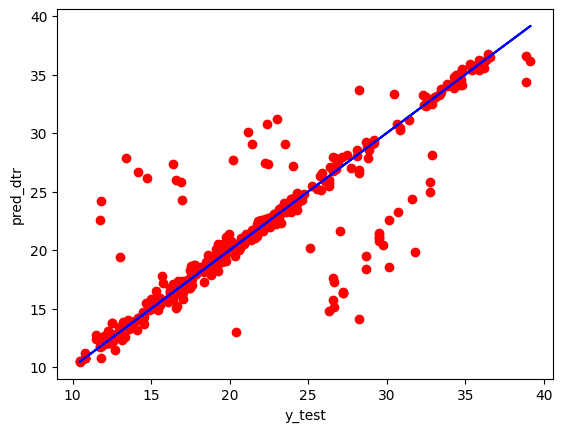

In [ ]:
plt.scatter(x=pred_dtr,y=y_test,color='red')
plt.plot(pred_dtr,pred_dtr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_dtr')
plt.show()

#SVR

In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_svr))
print('MAE',mean_absolute_error(y_test,pred_svr))
print('MSE',mean_squared_error(y_test,pred_svr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 Score 0.8735643697211066
MAE 1.0309945696375786
MSE 5.887513100662567
RMSE 2.4264198112986484


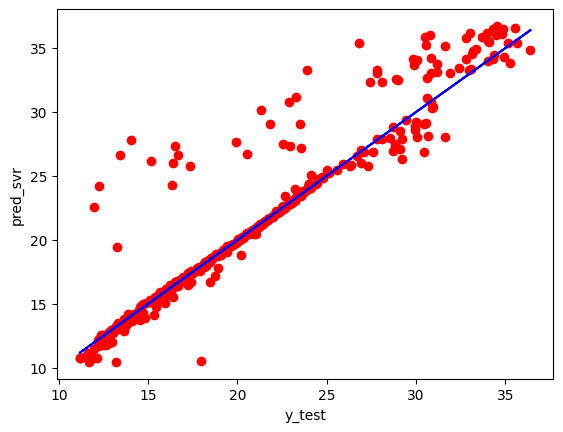

In [ ]:
plt.scatter(x=pred_svr,y=y_test,color='red')
plt.plot(pred_svr,pred_svr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_svr')
plt.show()

#ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_etr))
print('MAE',mean_absolute_error(y_test,pred_etr))
print('MSE',mean_squared_error(y_test,pred_etr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 Score 0.8470459899258369
MAE 1.3404950110667035
MSE 7.1223494209989235
RMSE 2.6687730178864824


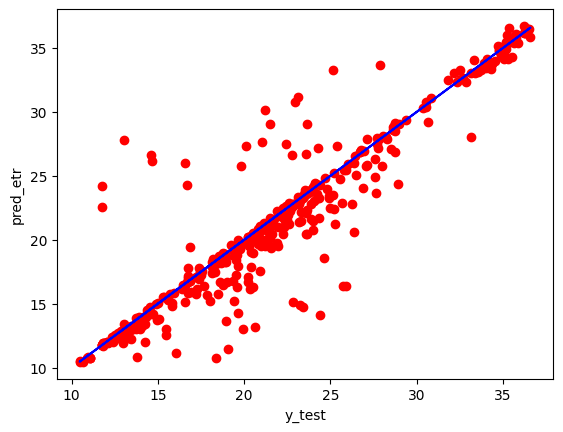

In [ ]:
plt.scatter(x=pred_etr,y=y_test,color='red')
plt.plot(pred_etr,pred_etr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_etr')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#score for Linear Regression
score=cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_lr)) - score.mean())

[0.80441799 0.70809545 0.82984593 0.76660913 0.76657185]
0.7751080702218368
Difference between R2 score and cross valication score is 0.05335619220815724


In [ ]:
#score for RandomForest Regression
score=cross_val_score(rfr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_rfr)) - score.mean())

[0.83951329 0.71164095 0.86548554 0.81733822 0.80510204]
0.8078160100968115
Difference between R2 score and cross valication score is 0.06788702974373761


In [ ]:
#score for KNN
score=cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_knn)) - score.mean())

[0.84221987 0.70002835 0.85074795 0.80927654 0.79171075]
0.798796692648609
Difference between R2 score and cross valication score is 0.040509258897143074


In [ ]:
#score for GradientBoostingRegression
score=cross_val_score(gbr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_gbr)) - score.mean())

[0.86800192 0.75351498 0.89640703 0.8338133  0.82397507]
0.8351424614239749
Difference between R2 score and cross valication score is 0.05458241366266814


In [ ]:
#score for Lasso
score=cross_val_score(lasso,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_lasso)) - score.mean())

[0.73515879 0.66561747 0.72621948 0.7069297  0.70659085]
0.7081032562963963
Difference between R2 score and cross valication score is 0.03467763886575659


In [ ]:
#score for Ridge
score=cross_val_score(ridge,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_ridge)) - score.mean())

[0.80438923 0.70821962 0.82971798 0.76665407 0.76657676]
0.775111530463599
Difference between R2 score and cross valication score is 0.05331402156609788


In [ ]:
#score for DecisionTreeRegressor
score=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_dtr)) - score.mean())

[0.75407361 0.60728598 0.67048807 0.6603564  0.5582436 ]
0.6500895335911635
Difference between R2 score and cross valication score is 0.128066682847927


In [ ]:
#score for SVR
score=cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_svr)) - score.mean())

[0.86959271 0.72142553 0.87590698 0.80637429 0.79104431]
0.8128687628098472
Difference between R2 score and cross valication score is 0.060695606911259414


In [ ]:
#score for ExtratreeRegressor
score=cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross valication score is', (r2_score(y_test,pred_etr)) - score.mean())

[0.80809518 0.68365401 0.84141466 0.79408894 0.80199898]
0.7858503544462376
Difference between R2 score and cross valication score is 0.061195635479599275


Lasso Regression is the best performing model

#Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10],
              'random_state': [1, 10, 20]}
grid_search = GridSearchCV(Lasso(), parameters, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'random_state': [1, 10, 20]})

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'alpha': 0.001, 'random_state': 1}
Best score: 0.7486173832326702


In [ ]:
model=Lasso(alpha= 0.001, random_state= 1)

In [ ]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2 Score',r2_score(y_test,pred))
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score 0.828451107157671
MAE 1.948134729685349
MSE 7.988225722334028
RMSE 2.826344940437035


In [ ]:
result=model.score(x_test,y_test)
result

0.828451107157671

In [ ]:
conclusion=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['Predicted','Orginal'])

In [ ]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
Predicted,23.391135,20.041440,26.557494,33.471014,33.675910,20.607824,20.243489,30.256164,18.844816,14.582784,...,19.667681,26.96933,22.427528,18.587038,21.796369,20.226725,19.006857,20.364807,14.352952,14.571295
Orginal,22.300771,20.014208,32.591173,29.058028,28.831918,20.049609,20.208065,27.477553,17.384021,11.980144,...,19.171778,33.11311,23.760959,18.568571,21.447903,18.143278,17.374865,19.082468,13.891939,12.535078
